In [1]:
import pandas as pd
import json
from tqdm import tqdm_notebook
import seaborn as sns
from utils import add_region
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH = "../dados/brutos/casos_covid19_25julho2020.csv"

In [3]:
data_df = pd.read_csv(PATH)

In [4]:
data_df = add_region(data_df)
data_df.to_csv(PATH)

- Mapeados: 100%|██████████| 2954/2954 [00:00<00:00, 3813.21it/s]


In [5]:
data_df.tail()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,region
2949,26,2020-06-25,Brazil,SC,TOTAL,10,289,1030,21951,279,20921,4.03362,306.37334,0.01317,16377.0,4810.0,75204.0,1049.63329,Sul
2950,26,2020-06-25,Brazil,SE,TOTAL,0,524,728,21081,524,20353,22.79553,917.08516,0.02486,7579.0,11886.0,41589.0,1809.24315,Nordeste
2951,26,2020-06-25,Brazil,SP,TOTAL,407,13759,9765,248587,13352,238822,29.96360,541.35921,0.05535,49295.0,257900.0,602384.0,1311.83901,Sudeste
2952,26,2020-06-25,Brazil,TO,TOTAL,2,183,327,9425,181,9098,11.63481,599.22460,0.01942,5670.0,768.0,17811.0,1132.39144,Norte
2953,26,2020-06-25,Brazil,TOTAL,TOTAL,993,54878,39508,1232179,53830,1188631,26.11409,586.34112,0.04454,670417.0,692432.0,2793176.0,1329.15261,TOTAL


In [6]:
data_df.columns

Index(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'region'],
      dtype='object')

# Análise do Brasil

In [7]:
brasil_df = data_df[data_df["state"] == "TOTAL"]
brasil_df.set_index("date", inplace=True)
brasil_df.sort_index(inplace=True)

In [8]:
brasil_df.head()

,epi_week,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,region
date,,,,,,,,,,,,,,,,,,
2020-02-25,9,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN,TOTAL
2020-02-26,9,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN,TOTAL
2020-02-27,9,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN,TOTAL
2020-02-28,9,Brazil,TOTAL,TOTAL,0,0,1,2,0,1,0.0,0.00095,0.0,NaN,NaN,NaN,NaN,TOTAL
2020-02-29,9,Brazil,TOTAL,TOTAL,0,0,0,2,0,2,0.0,0.00095,0.0,NaN,NaN,NaN,NaN,TOTAL


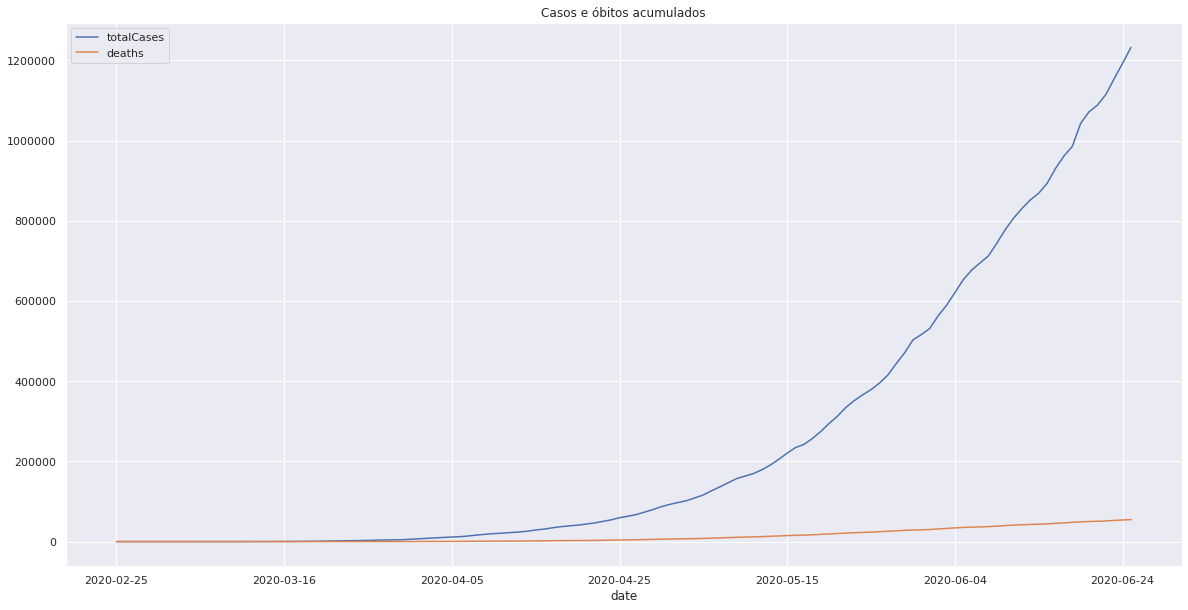

In [9]:
brasil_df[["totalCases", "deaths"]].plot(title="Casos e óbitos acumulados")

# Análise de estados

In [10]:
aux_df = data_df[data_df["state"] != "TOTAL"].groupby(["date", "state"]).sum()
aux_df.reset_index(inplace=True)

In [11]:
aux_df

,date,state,epi_week,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,2020-02-25,SP,9,0,0,1,1,0,0,0.00000,0.00218,0.00000,0.0,0.0,0.0,0.00000
1,2020-02-26,SP,9,0,0,0,1,0,1,0.00000,0.00218,0.00000,0.0,0.0,0.0,0.00000
2,2020-02-27,SP,9,0,0,0,1,0,1,0.00000,0.00218,0.00000,0.0,0.0,0.0,0.00000
3,2020-02-28,SP,9,0,0,1,2,0,1,0.00000,0.00436,0.00000,0.0,0.0,0.0,0.00000
4,2020-02-29,SP,9,0,0,0,2,0,2,0.00000,0.00436,0.00000,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,2020-06-25,RS,26,0,500,1051,23060,500,22009,4.39474,202.68538,0.02168,18446.0,2167.0,113189.0,994.87231
2828,2020-06-25,SC,26,10,289,1030,21951,279,20921,4.03362,306.37334,0.01317,16377.0,4810.0,75204.0,1049.63329
2829,2020-06-25,SE,26,0,524,728,21081,524,20353,22.79553,917.08516,0.02486,7579.0,11886.0,41589.0,1809.24315
2830,2020-06-25,SP,26,407,13759,9765,248587,13352,238822,29.96360,541.35921,0.05535,49295.0,257900.0,602384.0,1311.83901


In [12]:
estados_df = aux_df.set_index("date").pivot(columns="state")

In [13]:
estados_df.tail()

epi_week                                                        \
state            AC    AL    AM    AP    BA    CE    DF    ES    GO    MA   
date                                                                        
2020-06-21     26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0   
2020-06-22     26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0   
2020-06-23     26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0   
2020-06-24     26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0   
2020-06-25     26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0  26.0   

            ... tests_per_100k_inhabitants                                    \
state       ...                         PR        RJ          RN          RO   
date        ...                                                                
2020-06-21  ...                   642.1399  601.1604  1268.74437  2999.17005   
2020-06-22  ...                   642.1399  601.1604  1268.74437  2999.17005   
2020-06-23  ...                   642.1399  601.1604  1268.74437  2999.17005   
2020-06-24  ...                   642.1399  601.1604  1585.26747  2999.17005   
2020-06-25  ...                   642.1399  601.1604  1585.26747  2999.17005   

                                                                       \
state               RR         RS          SC          SE          SP   
date                                                                    
2020-06-21  2455.58892  994.87231  1049.63329  1809.24315  1311.83901   
2020-06-22  2455.58892  994.87231  1049.63329  1809.24315  1311.83901   
2020-06-23  2455.58892  994.87231  1049.63329  1809.24315  1311.83901   
2020-06-24  2455.58892  994.87231  1049.63329  1809.24315  1311.83901   
2020-06-25  2455.58892  994.87231  1049.63329  1809.24315  1311.83901   

                        
state               TO  
date                    
2020-06-21  1132.39144  
2020-06-22  1132.39144  
2020-06-23  1132.39144  
2020-06-24  1132.39144  
2020-06-25  1132.39144  

[5 rows x 378 columns]

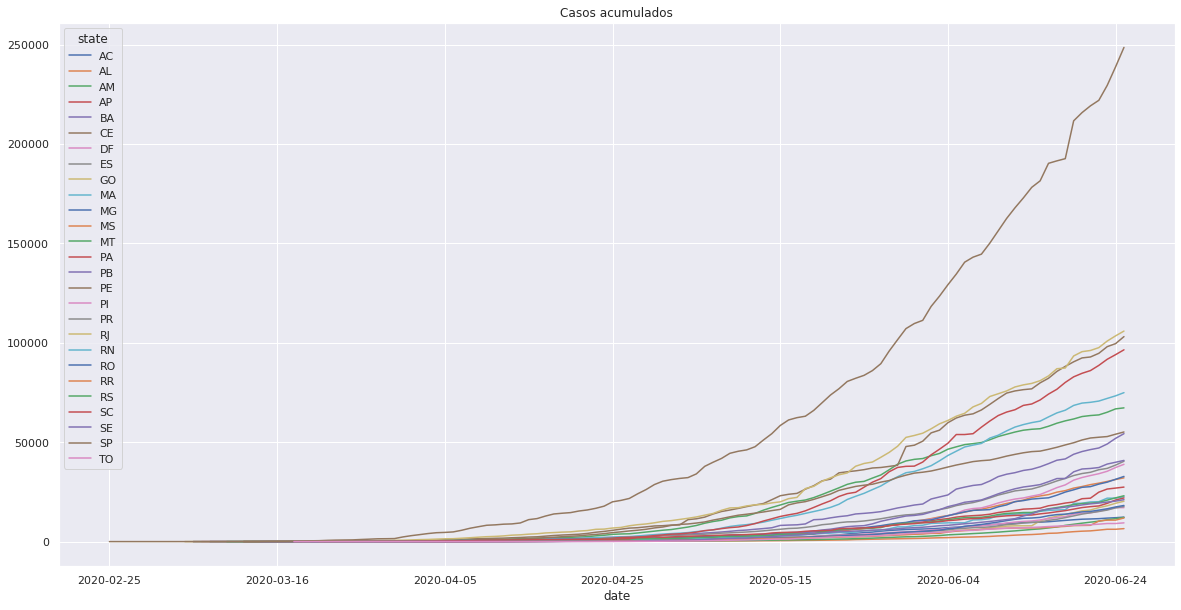

In [14]:
estados_df["totalCases"].plot(title="Casos acumulados")

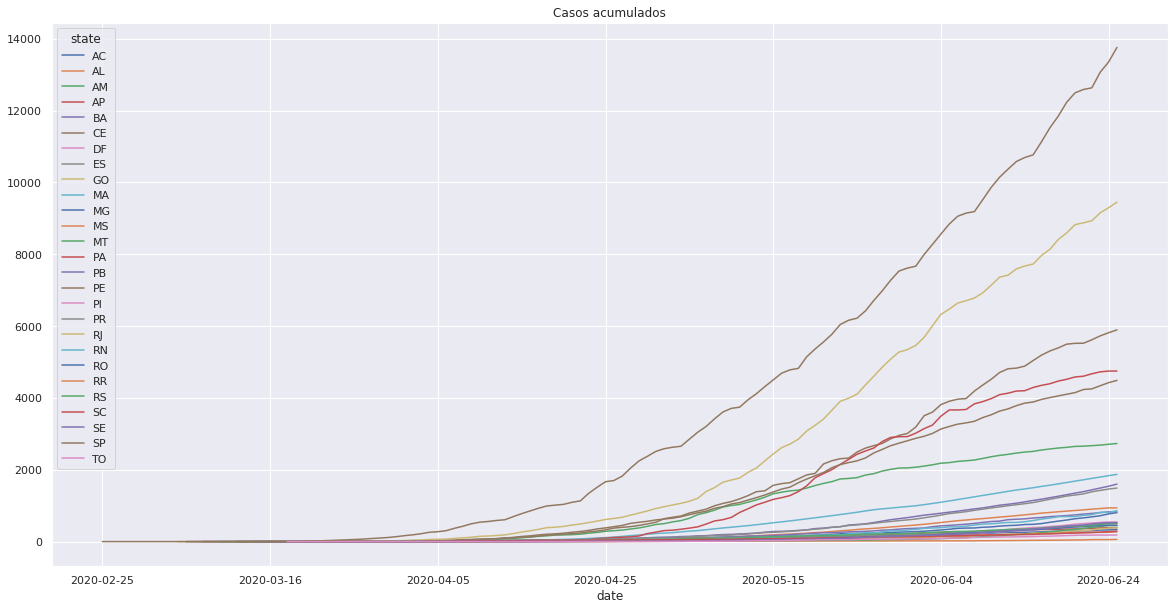

In [15]:
estados_df["deaths"].plot(title="Casos acumulados")

# Análise de regiões

In [16]:
regioes_df = data_df[data_df["region"] != "TOTAL"].groupby(["date", "region"]).sum()

In [17]:
regioes_df.tail(5)

epi_week  newDeaths  deaths  newCases  totalCases  \
date       region                                                        
2020-06-25 DF              26         14     509      1617       38871   
           Nordeste       234        282   17549     11854      421119   
           Norte          182         44    9110      5862      242928   
           Sudeste        104        624   25505     15518      427659   
           Sul             78         15    1315      2736       62629   

                     deathsMS  totalCasesMS  deaths_per_100k_inhabitants  \
date       region                                                          
2020-06-25 DF             495         37254                     16.88075   
           Nordeste     17248        408341                    261.37703   
           Norte         9044        234738                    286.80147   
           Sudeste      24881        412139                    125.58341   
           Sul           1300         59893                     13.02869   

                     totalCases_per_100k_inhabitants  deaths_by_totalCases  \
date       region                                                            
2020-06-25 DF                             1289.13914               0.01309   
           Nordeste                       7190.21438               0.33736   
           Norte                         10962.70971               0.19846   
           Sudeste                        2314.98420               0.20607   
           Sul                             663.14361               0.06471   

                     recovered  suspects     tests  tests_per_100k_inhabitants  
date       region                                                               
2020-06-25 DF          26493.0   10172.0  215333.0                  7141.42159  
           Nordeste   255064.0  200101.0  972007.0                 17138.55376  
           Norte      165603.0   10198.0  396099.0                 19671.55452  
           Sudeste    178180.0  400882.0  862080.0                  4390.79283  
           Sul         39421.0   16918.0  261815.0                  2686.64550

In [18]:
# Indexando apenas pela data
regioes_df = regioes_df.reset_index().set_index("date")

In [19]:
regioes_df

,region,epi_week,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
date,,,,,,,,,,,,,,,
2020-02-25,Sudeste,9,0,0,1,1,0,0,0.00000,0.00218,0.00000,0.0,0.0,0.0,0.00000
2020-02-26,Sudeste,9,0,0,0,1,0,1,0.00000,0.00218,0.00000,0.0,0.0,0.0,0.00000
2020-02-27,Sudeste,9,0,0,0,1,0,1,0.00000,0.00218,0.00000,0.0,0.0,0.0,0.00000
2020-02-28,Sudeste,9,0,0,1,2,0,1,0.00000,0.00436,0.00000,0.0,0.0,0.0,0.00000
2020-02-29,Sudeste,9,0,0,0,2,0,2,0.00000,0.00436,0.00000,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-25,DF,26,14,509,1617,38871,495,37254,16.88075,1289.13914,0.01309,26493.0,10172.0,215333.0,7141.42159
2020-06-25,Nordeste,234,282,17549,11854,421119,17248,408341,261.37703,7190.21438,0.33736,255064.0,200101.0,972007.0,17138.55376
2020-06-25,Norte,182,44,9110,5862,242928,9044,234738,286.80147,10962.70971,0.19846,165603.0,10198.0,396099.0,19671.55452


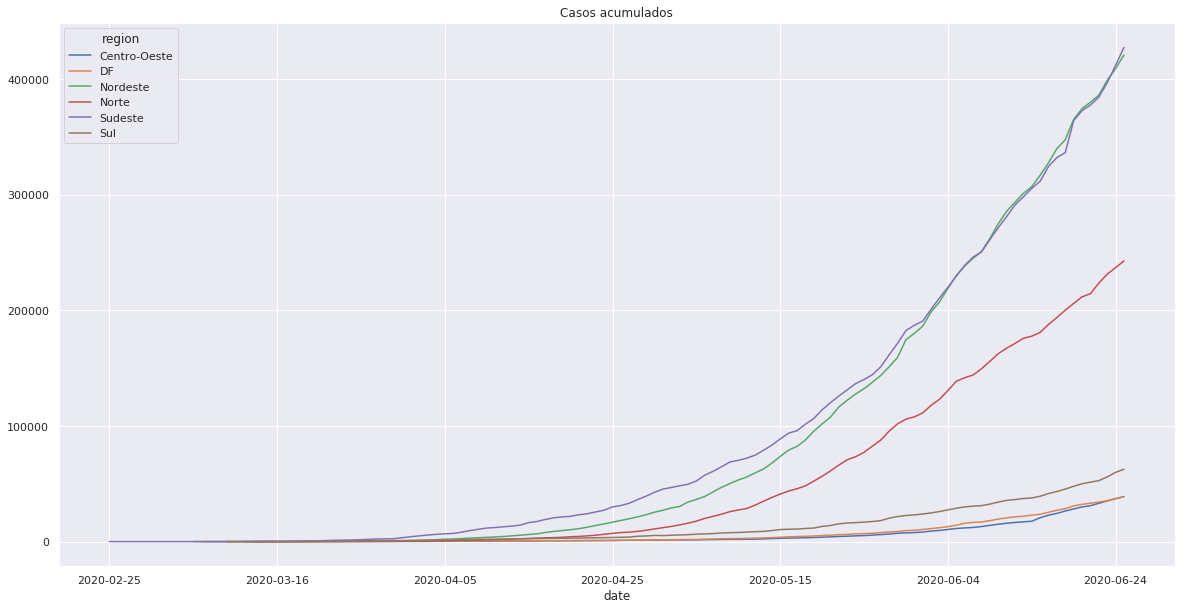

In [20]:
final_reg_df = regioes_df.pivot(columns="region")
final_reg_df["totalCases"].plot(title="Casos acumulados")

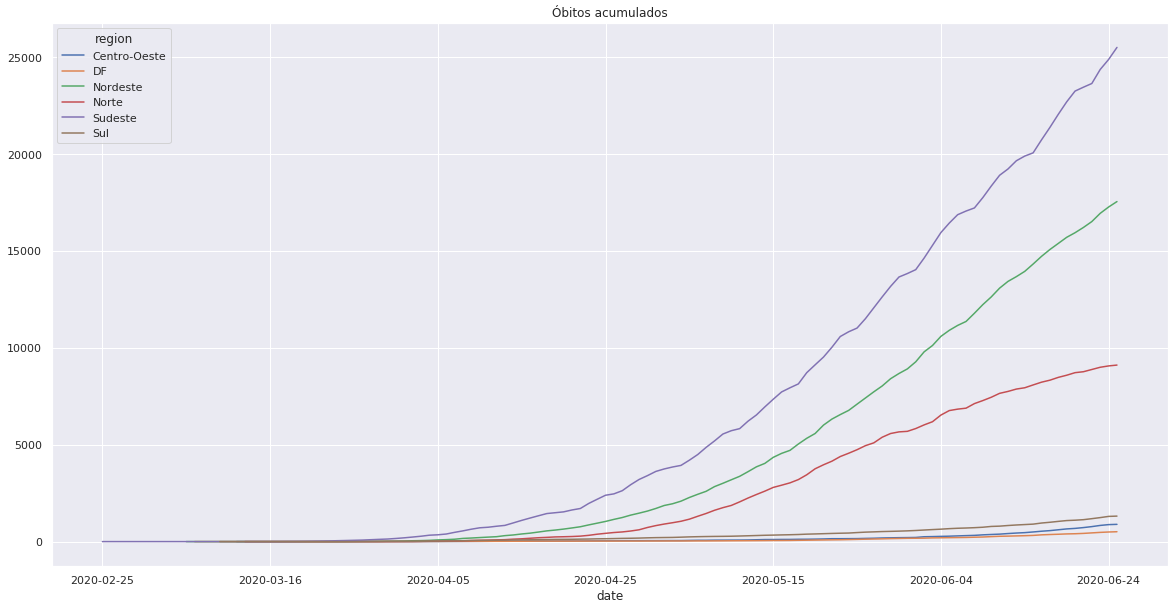

In [21]:
final_reg_df["deaths"].plot(title="Óbitos acumulados")

# Visualização dos dados mais recentes

In [22]:
final_reg_df.iloc[-1]["totalCases"]

region
Centro-Oeste     38973.0
DF               38871.0
Nordeste        421119.0
Norte           242928.0
Sudeste         427659.0
Sul              62629.0
Name: 2020-06-25, dtype: float64

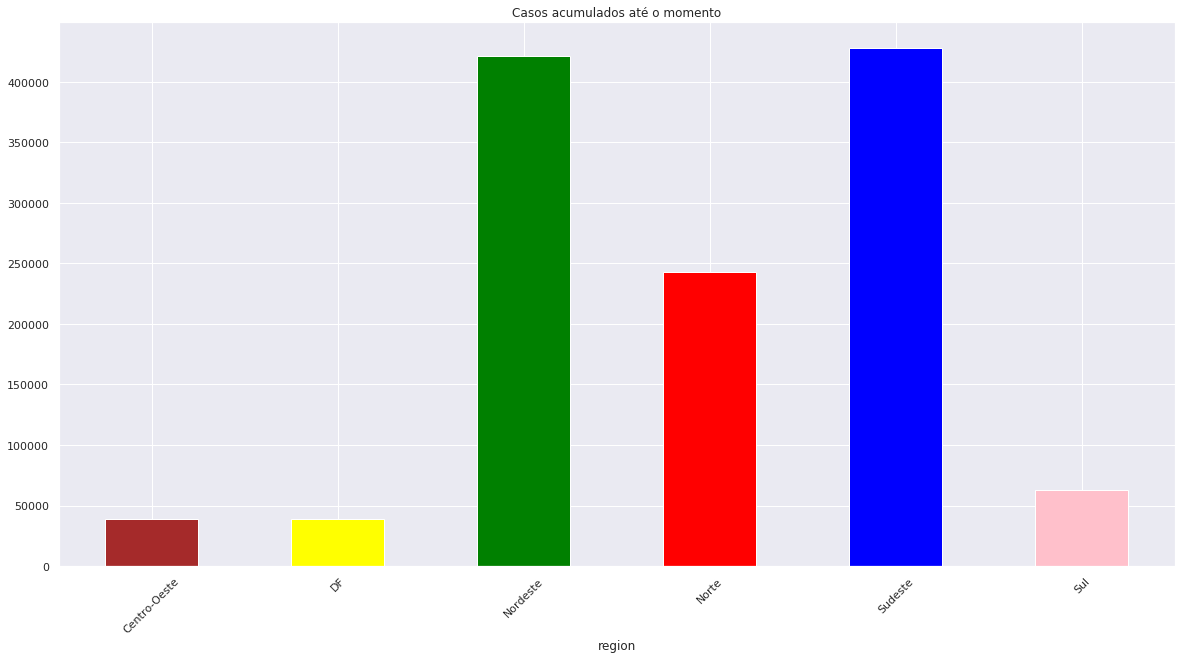

In [23]:
final_reg_df.iloc[-1]["totalCases"].plot.bar(rot=45, color=["brown", "yellow", "green", "red", "blue", "pink"], title="Casos acumulados até o momento")

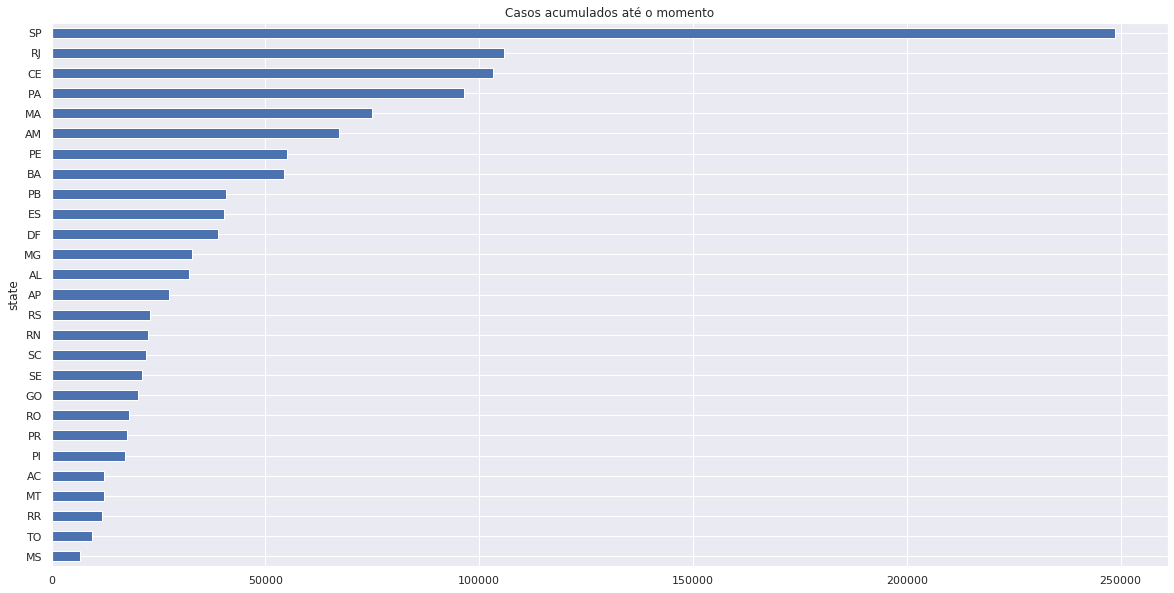

In [24]:
estados_df.iloc[-1]["totalCases"].sort_values().plot.barh(title="Casos acumulados até o momento")

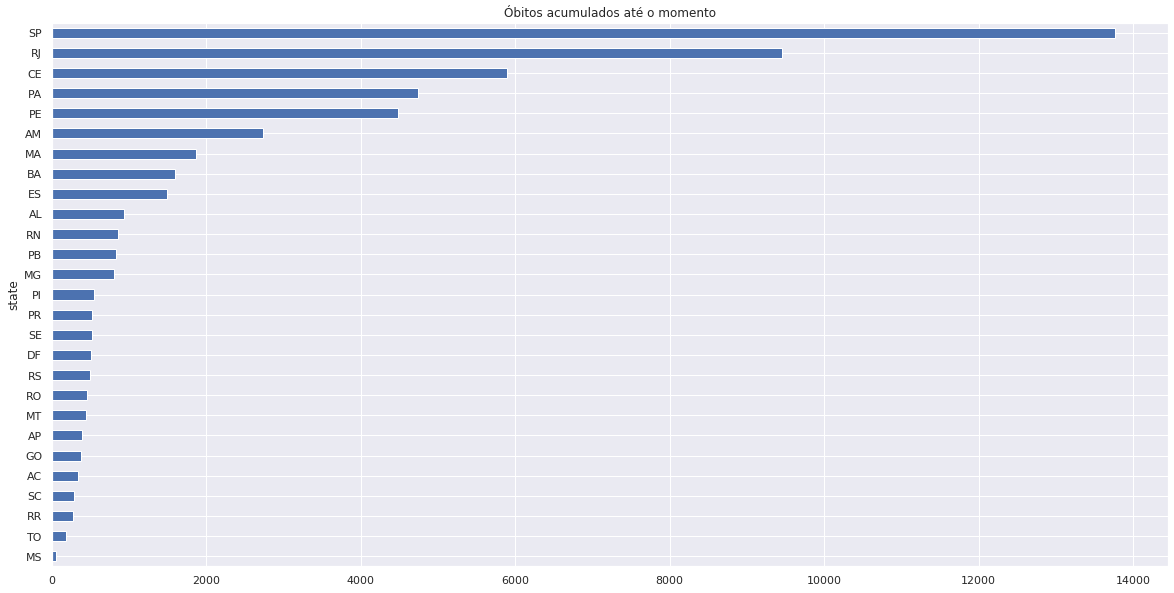

In [25]:
estados_df.iloc[-1]["deaths"].sort_values().plot.barh(title="Óbitos acumulados até o momento")

In [26]:
estado2sigla = json.load(open("../dados/siglas_estados.json", "r"))
sigla2estado = {sigla : estado for (estado, sigla) in estado2sigla.items()}

In [27]:
estados = data_df[data_df["state"] != "TOTAL"]["state"].unique()

In [28]:
estado_summary = pd.DataFrame(index=estados)

In [29]:
estado_summary["casos"] = [estados_df.iloc[-1]["totalCases"][estado] for estado in estados]
estado_summary["obitos"] = [estados_df.iloc[-1]["deaths"][estado] for estado in estados]
estado_summary.rename(index=sigla2estado, inplace=True)

In [30]:
estado_summary

,casos,obitos
São Paulo,248587.0,13759.0
Rio de Janeiro,105897.0,9450.0
Bahia,54291.0,1601.0
Espírito Santo,40406.0,1490.0
Distrito Federal,38871.0,509.0
Alagoas,32065.0,938.0
Minas Gerais,32769.0,806.0
Rio Grande do Sul,23060.0,500.0
Goiás,20293.0,384.0
Pernambuco,55136.0,4488.0


In [31]:
estado_summary.to_excel("../dados/processados/casos_obitos_por_estado.xlsx")